In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#descomprimir el archivo
import tarfile
fichero="housing.tgz"
f= tarfile.open(fichero)
f.extractall()
f.close()

In [1]:
datos= pd.read_csv('housing.csv')
datos.head()

NameError: name 'pd' is not defined

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
len(datos)

20640

In [6]:
datos['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

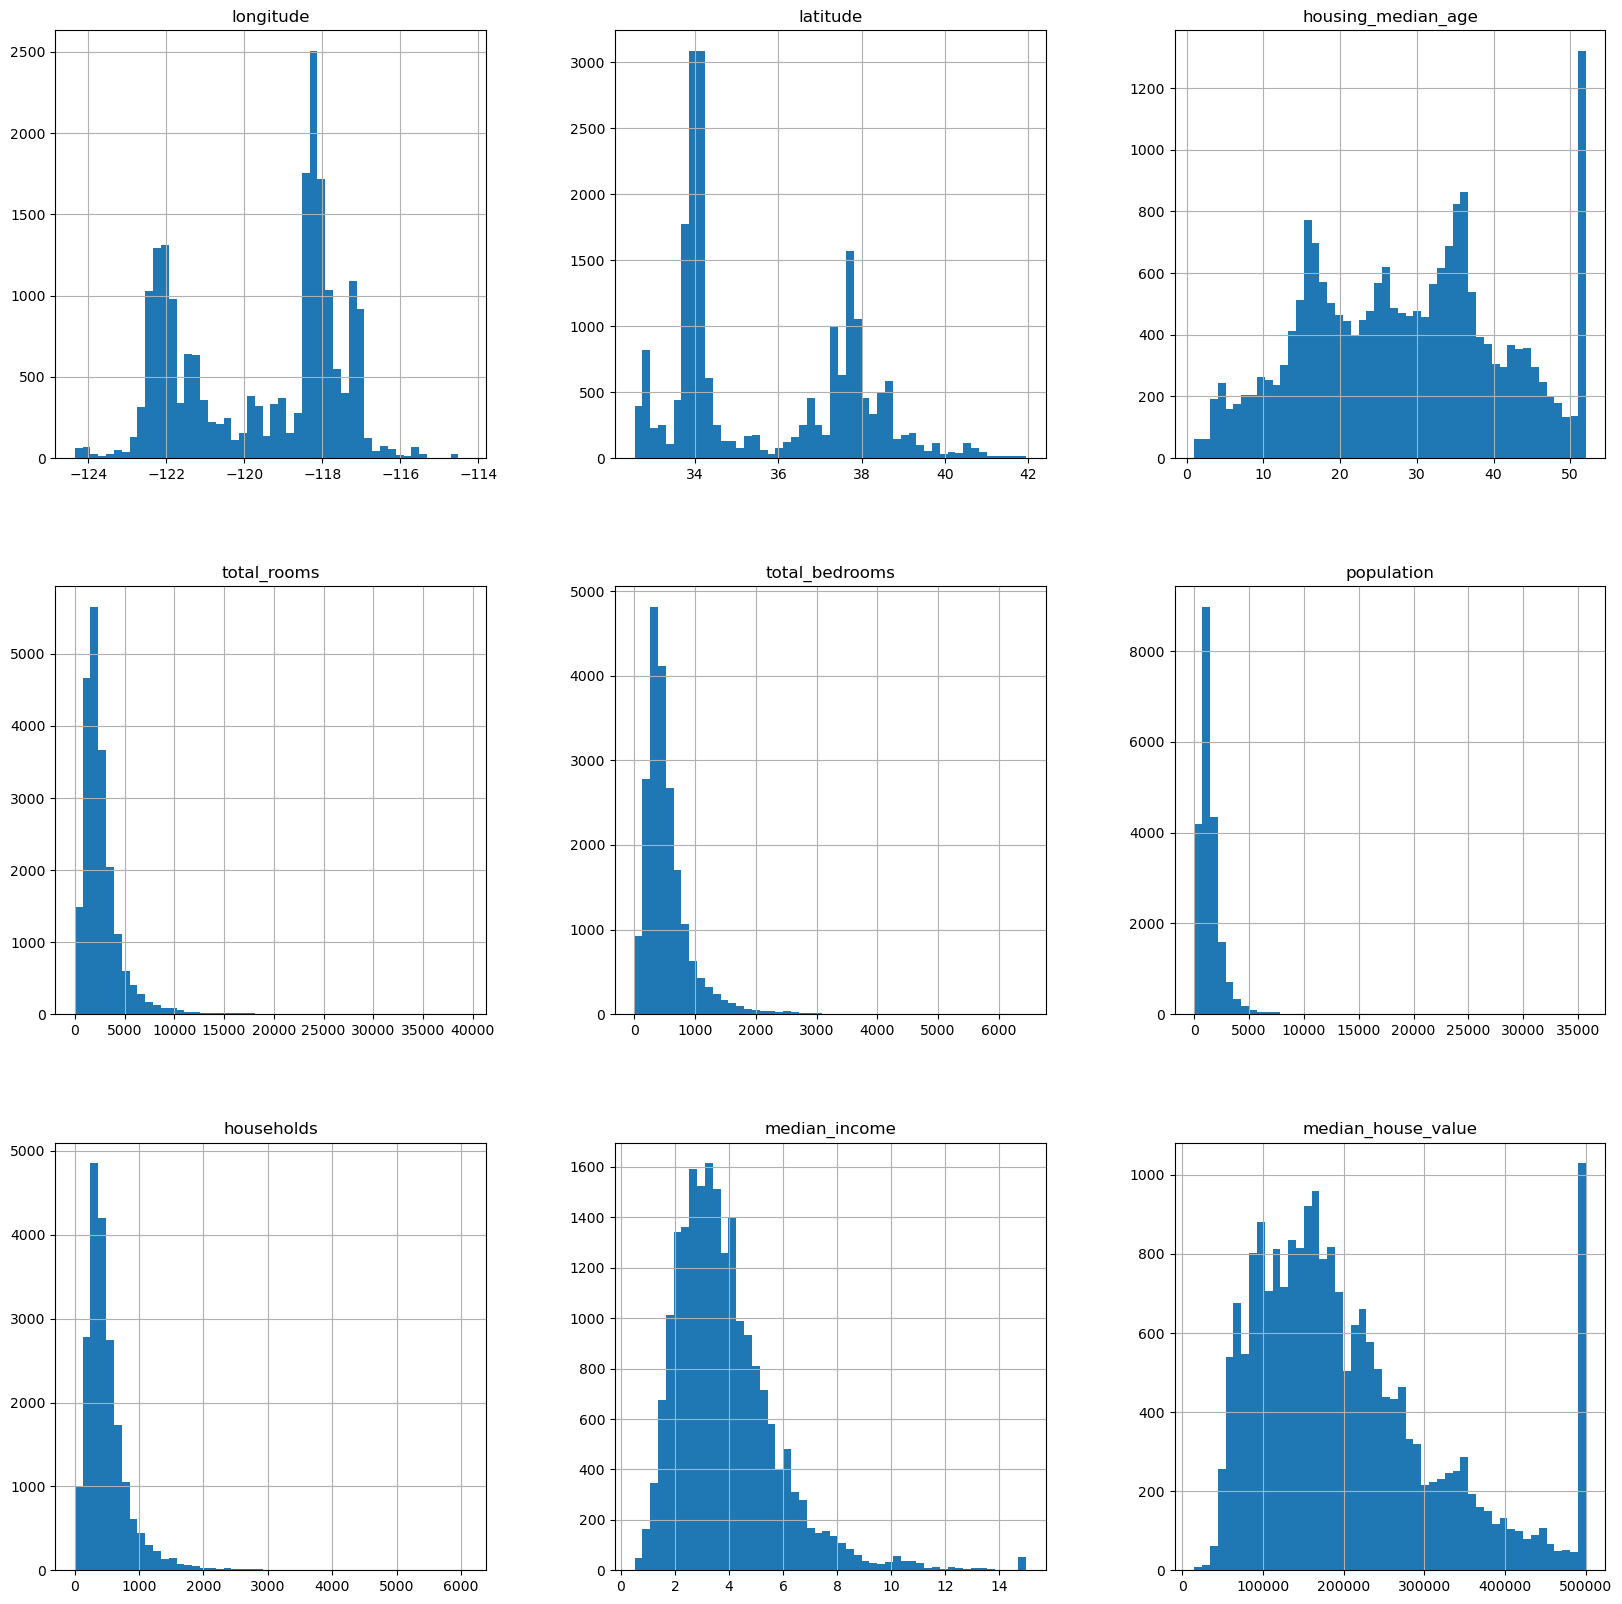

In [8]:
datos.hist(bins=50, figsize=(20,20))

<Axes: xlabel='longitude', ylabel='latitude'>

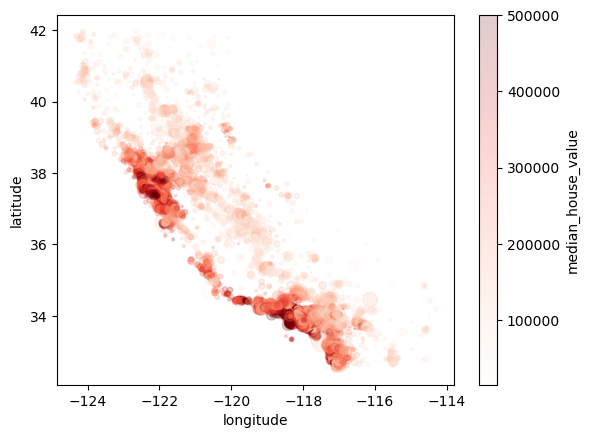

In [9]:
datos.plot(kind='scatter', x= 'longitude', y= 'latitude', alpha=0.2, s=(datos.population)/100, c='median_house_value',cmap='Reds')

In [10]:
# !pip install pillow
# !pip install basemap
# !pip install basemap-data-hires

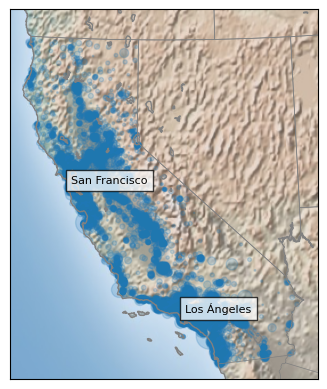

In [11]:
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap



m = Basemap(projection='lcc',
            resolution='h',
            lat_0=37.5,
            lon_0=-119,
            width=1E6,
            height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

m.scatter( datos["longitude"], datos["latitude"],
           alpha=0.2,
           latlon=True,
           s=datos["population"]/100)

x, y = m(-118.243683, 34.052235)
plt.text(x, y, 'Los Ángeles', fontsize=8, bbox=dict(facecolor="white", alpha=0.75));

x, y = m(-122.431297, 37.773972)
plt.text(x, y, 'San Francisco', fontsize=8, bbox=dict(facecolor="white", alpha=0.75));

In [12]:

datos2= datos.drop(['ocean_proximity'], axis=1)
# Matriz de correlación
corr_matrix= datos2.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

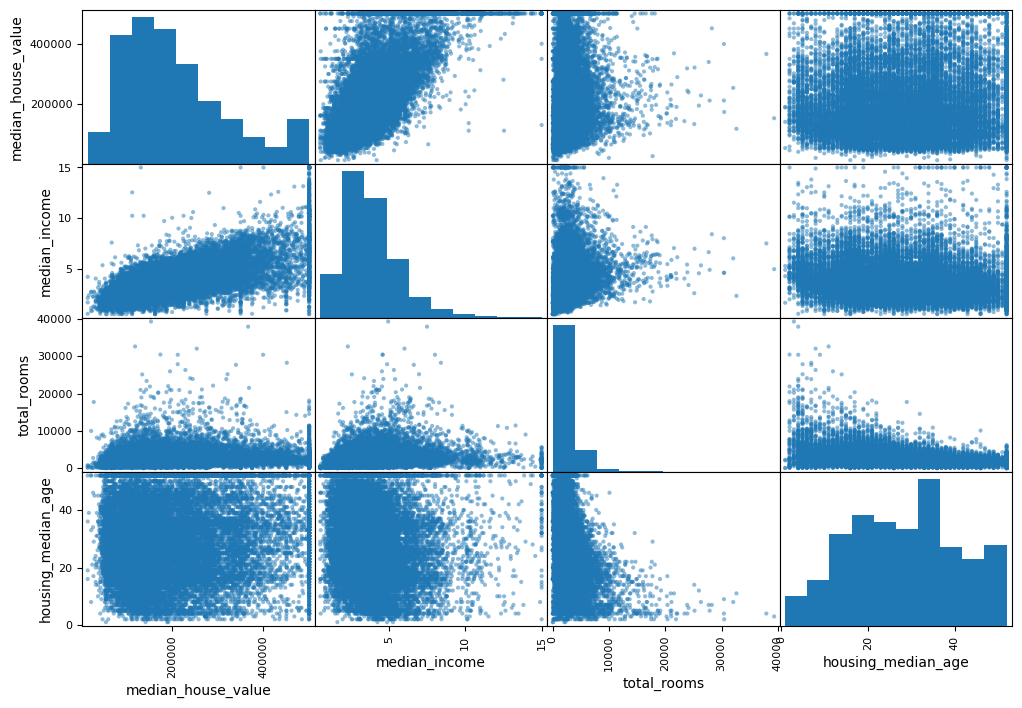

In [13]:
from pandas.plotting import scatter_matrix
atributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(datos[atributes], figsize=(12,8))

In [14]:
datos2['rooms_per_household']=datos2['total_rooms']/datos2['households']
datos2['bedrooms_per_room']=datos2['total_bedrooms']/datos2['total_rooms']
datos2['population_per_household']=datos2['population']/datos2['households']
datos2


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,5.329513,0.219892,2.123209


In [15]:
corr_matrix= datos2.corr()
corr_matrix['median_house_value'].sort_values()

bedrooms_per_room          -0.255880
latitude                   -0.144160
longitude                  -0.045967
population                 -0.024650
population_per_household   -0.023737
total_bedrooms              0.049686
households                  0.065843
housing_median_age          0.105623
total_rooms                 0.134153
rooms_per_household         0.151948
median_income               0.688075
median_house_value          1.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>

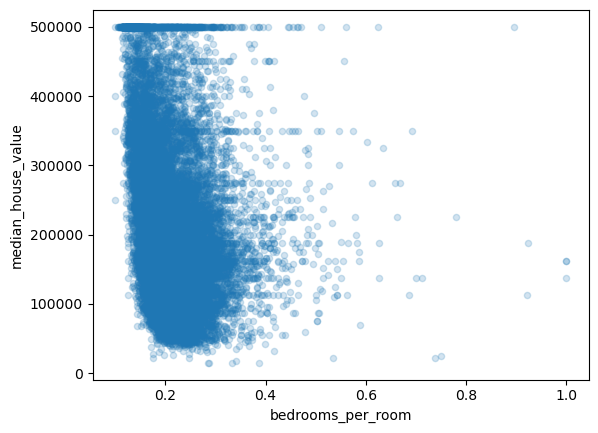

In [16]:
datos2.plot(kind='scatter', x='bedrooms_per_room',y= 'median_house_value', alpha=0.2)

<Axes: xlabel='median_income', ylabel='median_house_value'>

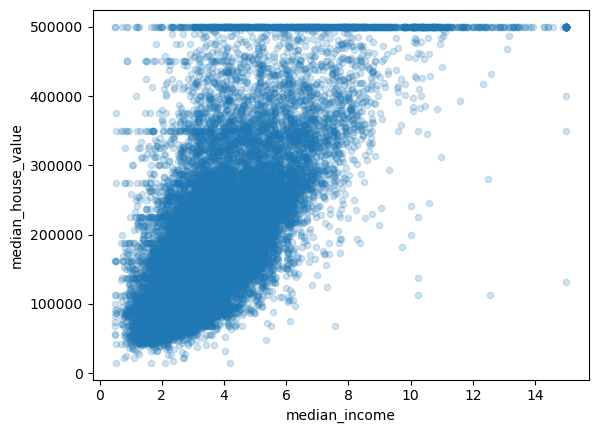

In [17]:
datos2.plot(kind='scatter', x='median_income',y= 'median_house_value', alpha=0.2)

<Axes: >

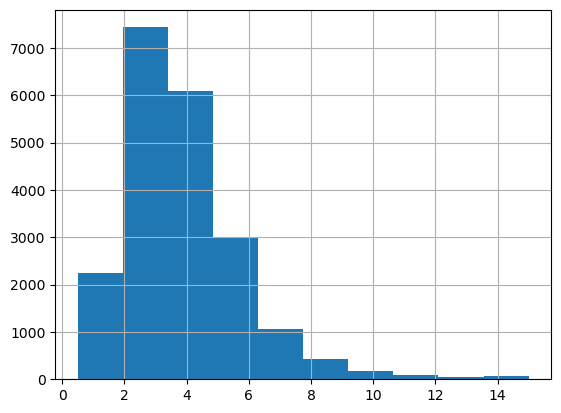

In [18]:
datos['median_income'].hist()

In [19]:
datos['income_cat']= pd.cut(datos['median_income'], bins = [0,1.5,3,4.5,6,np.inf], labels=[1,2,3,4,5])

In [20]:
datos.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
19181,-122.61,38.42,13.0,7731.0,1360.0,2543.0,1249.0,4.6957,259800.0,<1H OCEAN,4


In [21]:
datos['income_cat']= pd.to_numeric(datos['income_cat'])

<Axes: >

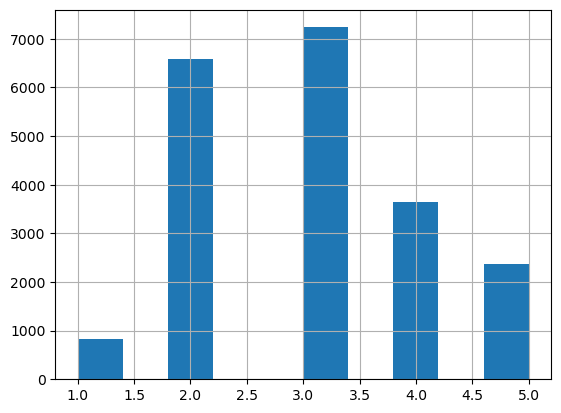

In [22]:
datos['income_cat'].hist()

In [23]:
datos['income_cat'].value_counts()/len(datos)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [24]:
media= datos['total_bedrooms'].median()
media

435.0

In [25]:
datos['total_bedrooms'].fillna(media, inplace=True)

In [26]:
ocean=datos[['ocean_proximity']]
ocean.value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

In [27]:
# si ordenados
from sklearn.preprocessing import OrdinalEncoder
oe= OrdinalEncoder()
housing_cat_encoded = oe.fit_transform(ocean)
housing_cat_encoded[:10]


array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder(sparse=False)#asi usa el formateado de arraiss de normal sino hace una forma simplificada
housing_cat_hot=cat_encoder.fit_transform(ocean)
housing_cat_hot

c:\Users\david.fernandezrebor\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [29]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [37]:
col_aux=[cat for cat in cat_encoder.categories_[0]]
daux= pd.DataFrame(housing_cat_hot,columns=col_aux)
daux
datos3=datos.copy()
datos3=datos3.join(daux)
datos3=datos3.drop(['ocean_proximity'],axis=1)
datos3

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,0.0,1.0,0.0,0.0,0.0


In [40]:
def split_train_test(data, test_ratio):
  # indices = [i for i in range(len(data))]; indices = np.shuffle(.....)
  indices = np.random.permutation(len(data))
  lg_test = int(len(data) * test_ratio)
  test_indices = indices[:lg_test]
  train_indices = indices[lg_test:]

  return data.iloc[train_indices], data.iloc[test_indices]

np.random.seed(42)

datos_train, datos_test = split_train_test(datos3, 0.2)
len(datos_train), len(datos_test)

(16512, 4128)

In [43]:
y_train = datos_train["median_house_value"].copy()
#estaria bien eliminar as columnas que non teññen correlacion
x_train = datos_train.drop("median_house_value", axis=1)

In [47]:
#regresion lineal
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(x_train,y_train)


LinearRegression()

In [51]:
datos_prueba=x_train.iloc[:5]
print('Prediciones:', lin_reg.predict(datos_prueba))
y_reales=y_train.iloc[:5]
print('Reales:', list(y_reales))




Prediciones: [192465.21848424 291585.84923054 247010.27666452 146747.07617523
 168638.87731665]
Reales: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

predicciones = lin_reg.predict(x_train)
mse = mean_squared_error(y_train, predicciones)
mse = np.sqrt(mse)
mae = mean_absolute_error(y_train, predicciones)
print(f"mae: {mae}   mse: {mse}")


mae: 49704.124118541484   mse: 68235.55069803342
